In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [5]:
from zipline.data.data_portal import DataPortal
from zipline.data import bundles
from zipline.utils.calendar_utils import register_calendar, get_calendar

In [6]:
bundle_data = bundles.load('quandl')

In [7]:
end_date = pd.Timestamp('2019-01-01', tz = 'utc' )

In [8]:
bundle_data.equity_daily_bar_reader.first_trading_day

Timestamp('1990-01-02 00:00:00')

In [10]:
data_por = DataPortal(
    asset_finder = bundle_data.asset_finder,
    trading_calendar =  get_calendar('NYSE'),
    first_trading_day = bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_daily_reader = bundle_data.equity_daily_bar_reader

    
)

In [11]:
TSLA = data_por.asset_finder.lookup_symbol(
    "NVDA",
    as_of_date = None

)

In [12]:
df = data_por.get_history_window(
    assets = [TSLA],
    end_dt = end_date,
    bar_count = 365 * 4,
    frequency = '1d',
    data_frequency = 'daily',
    field = 'close'

)


In [14]:
df.head()

,Equity(2046 [NVDA])
2013-03-18,12.55
2013-03-19,12.47
2013-03-20,12.62
2013-03-21,12.42
2013-03-22,12.48


In [15]:
df.describe()

,Equity(2046 [NVDA])
count,1266.000000
mean,61.931420
std,65.886722
min,12.126000
25%,18.541250
50%,23.525000
75%,97.745000
max,250.480000


In [16]:
df = df.dropna()

In [18]:
df.index = pd.DatetimeIndex(df.index)

In [19]:
list(df.columns)[0]

Equity(2046 [NVDA])

In [20]:
df['close'] = df[list(df.columns)[0]]

C:\Users\GOD WORLD\AppData\Local\Temp\tmpqo0sx8vv\ipykernel_23980\2264149235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close'] = df[list(df.columns)[0]]


In [21]:
df.head()

,Equity(2046 [NVDA]),close
2013-03-18,12.55,12.55
2013-03-19,12.47,12.47
2013-03-20,12.62,12.62
2013-03-21,12.42,12.42
2013-03-22,12.48,12.48


In [22]:
df = df.drop(columns = [list(df.columns)[0]])

In [23]:
df.head()

,close
2013-03-18,12.55
2013-03-19,12.47
2013-03-20,12.62
2013-03-21,12.42
2013-03-22,12.48


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


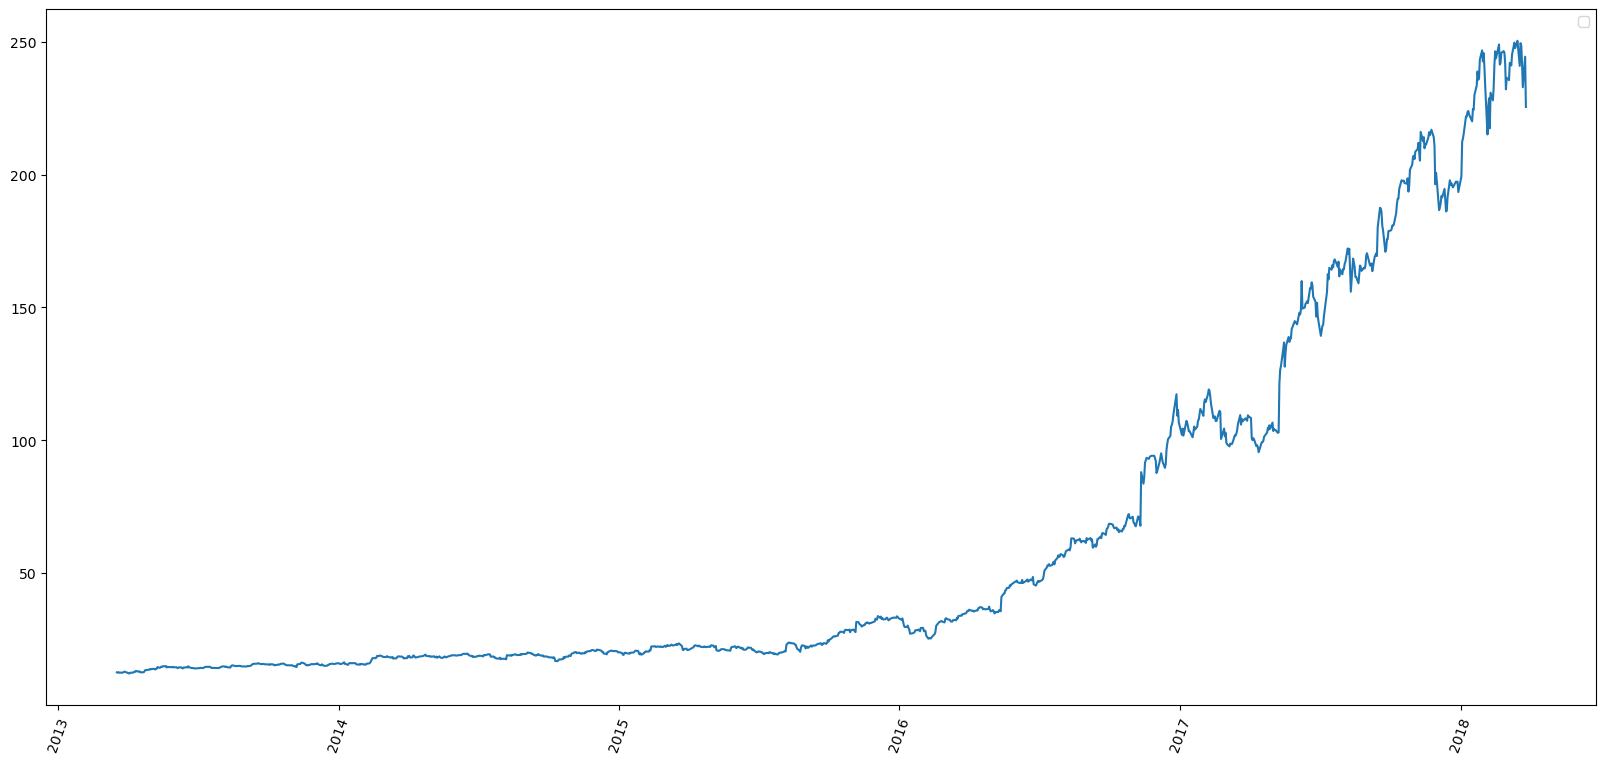

<Figure size 640x480 with 0 Axes>

In [25]:
from matplotlib.dates import YearLocator, date2num, DateFormatter

fig, ax = plt.subplots()

fig.subplots_adjust(bottom = 0.3)

fig.set_figwidth(20)
fig.set_figheight(12)

ax.plot(df.index, df.close)

lctr = YearLocator()
frmt = DateFormatter("%Y")

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

ax.legend()

plt.xticks(rotation = 70)
plt.show()
plt.tight_layout()

# Data preprocessing and feature engineering

In [26]:
df['1d'] = df.shift(-1)
df.head()

,close,1d
2013-03-18,12.55,12.47
2013-03-19,12.47,12.62
2013-03-20,12.62,12.42
2013-03-21,12.42,12.48
2013-03-22,12.48,12.41


In [27]:
for d in range(2, 41):
    col = '%dd' % d
    df[col] = df['close'].shift(-1 * d)
    
df.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18,12.55,12.47,12.62,12.42,12.48,12.41,12.500,12.650,12.830,12.410,...,13.65,13.810,13.870,13.830,13.650,13.899,13.910,14.540,14.240,14.450
2013-03-19,12.47,12.62,12.42,12.48,12.41,12.50,12.650,12.830,12.410,12.275,...,13.81,13.870,13.830,13.650,13.899,13.910,14.540,14.240,14.450,14.695
2013-03-20,12.62,12.42,12.48,12.41,12.50,12.65,12.830,12.410,12.275,12.126,...,13.87,13.830,13.650,13.899,13.910,14.540,14.240,14.450,14.695,14.630
2013-03-21,12.42,12.48,12.41,12.50,12.65,12.83,12.410,12.275,12.126,12.245,...,13.83,13.650,13.899,13.910,14.540,14.240,14.450,14.695,14.630,14.870
2013-03-22,12.48,12.41,12.50,12.65,12.83,12.41,12.275,12.126,12.245,12.460,...,13.65,13.899,13.910,14.540,14.240,14.450,14.695,14.630,14.870,14.840


In [28]:
df.tail()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2018-03-21,248.56,241.85,232.97,244.48,225.52,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-22,241.85,232.97,244.48,225.52,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-23,232.97,244.48,225.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26,244.48,225.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-27,225.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df.dropna()

In [30]:
df.tail()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2018-01-23,238.91,235.80,236.35,243.33,246.85,242.72,245.80,240.50,233.52,215.19,...,241.18,245.33,249.76,247.71,248.74,249.34,250.48,241.00,249.58,248.56
2018-01-24,235.80,236.35,243.33,246.85,242.72,245.80,240.50,233.52,215.19,225.58,...,245.33,249.76,247.71,248.74,249.34,250.48,241.00,249.58,248.56,241.85
2018-01-25,236.35,243.33,246.85,242.72,245.80,240.50,233.52,215.19,225.58,228.80,...,249.76,247.71,248.74,249.34,250.48,241.00,249.58,248.56,241.85,232.97
2018-01-26,243.33,246.85,242.72,245.80,240.50,233.52,215.19,225.58,228.80,217.52,...,247.71,248.74,249.34,250.48,241.00,249.58,248.56,241.85,232.97,244.48
2018-01-29,246.85,242.72,245.80,240.50,233.52,215.19,225.58,228.80,217.52,230.93,...,248.74,249.34,250.48,241.00,249.58,248.56,241.85,232.97,244.48,225.52


In [31]:
for i in reversed(range(2, 41)):
    col = '%dd' % i # current column
    prv = '%dd' % (i-1) # Previou column
    df[col] = (df[col] - df[prv]) / df[prv]

In [32]:
df.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18,12.55,12.47,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,...,-0.008715,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747
2013-03-19,12.47,12.62,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,...,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955
2013-03-20,12.62,12.42,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,...,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423
2013-03-21,12.42,12.48,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405
2013-03-22,12.48,12.41,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017


In [33]:
df['1d'] = (df['1d'] - df['close']) / df['close']
df.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18,12.55,-0.006375,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,...,-0.008715,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747
2013-03-19,12.47,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,...,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955
2013-03-20,12.62,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,...,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423
2013-03-21,12.42,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405
2013-03-22,12.48,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017


In [34]:
df = df.drop(columns = ['close'])
df.head()

,1d,2d,3d,4d,5d,6d,7d,8d,9d,10d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18,-0.006375,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,...,-0.008715,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747
2013-03-19,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,...,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955
2013-03-20,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423
2013-03-21,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405
2013-03-22,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017


In [35]:
X = df.iloc[:, :32]
y = df.iloc[:, 32:]
X.head()

,1d,2d,3d,4d,5d,6d,7d,8d,9d,10d,...,23d,24d,25d,26d,27d,28d,29d,30d,31d,32d
2013-03-18,-0.006375,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,...,0.002392,0.001591,0.026211,0.034056,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722
2013-03-19,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,...,0.001591,0.026211,0.034056,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722,0.004345
2013-03-20,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,0.026211,0.034056,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722,0.004345,-0.002884
2013-03-21,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,0.034056,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722,0.004345,-0.002884,-0.013015
2013-03-22,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,...,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722,0.004345,-0.002884,-0.013015,0.018242


In [36]:
y.head()

,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747
2013-03-19,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955
2013-03-20,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423
2013-03-21,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405
2013-03-22,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017


In [37]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 5)

for train_index, test_index in tscv.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test  = y.iloc[train_index], y.iloc[test_index]
    
    print("Train strat: %d -> End %d "  %(train_index[0], train_index[-1]))
    print("Test start: %d -> End %d " % (test_index[0], test_index[-1]))
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("#" * 50)

Train strat: 0 -> End 205 
Test start: 206 -> End 409 
(206, 32) (206, 8)
(204, 32) (204, 8)
##################################################
Train strat: 0 -> End 409 
Test start: 410 -> End 613 
(410, 32) (410, 8)
(204, 32) (204, 8)
##################################################
Train strat: 0 -> End 613 
Test start: 614 -> End 817 
(614, 32) (614, 8)
(204, 32) (204, 8)
##################################################
Train strat: 0 -> End 817 
Test start: 818 -> End 1021 
(818, 32) (818, 8)
(204, 32) (204, 8)
##################################################
Train strat: 0 -> End 1021 
Test start: 1022 -> End 1225 
(1022, 32) (1022, 8)
(204, 32) (204, 8)
##################################################


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.01,
    n_estimators=50,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=32,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=1,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001
)


# Multi-Output Regression

In [50]:
from sklearn.multioutput import MultiOutputRegressor

# Assuming you have already created a 'regressor' instance
regressor = MultiOutputRegressor(regressor)


In [51]:
from sklearn.model_selection import cross_validate

cross_validate(regressor, X, y= y, cv = tscv, scoring = 'neg_mean_squared_error')

      Iter       Train Loss   Remaining Time 
         1           0.0002            2.08s
         2           0.0002            1.64s
         3           0.0002            1.41s
         4           0.0002            1.29s
         5           0.0002            1.19s
         6           0.0002            1.13s
         7           0.0002            1.08s
         8           0.0002            1.03s
         9           0.0002            0.99s
        10           0.0002            0.96s
        20           0.0001            0.71s
        30           0.0001            0.46s
        40           0.0001            0.23s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            1.32s
         2           0.0002            1.29s
         3           0.0002            1.27s
         4           0.0002            1.26s
         5           0.0002            1.23s
         6           0.0002            1.21s
        

         4           0.0002            2.78s
         5           0.0002            2.67s
         6           0.0002            2.58s
         7           0.0002            2.50s
         8           0.0002            2.43s
         9           0.0002            2.36s
        10           0.0002            2.30s
        20           0.0002            1.68s
        30           0.0001            1.11s
        40           0.0001            0.61s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            2.69s
         2           0.0002            2.62s
         3           0.0002            2.57s
         4           0.0002            2.51s
         5           0.0002            2.45s
         6           0.0002            2.39s
         7           0.0002            2.33s
         8           0.0002            2.27s
         9           0.0002            2.22s
        10           0.0002            2.16s
        2

         6           0.0003            7.55s
         7           0.0003            7.51s
         8           0.0003            7.43s
         9           0.0003            7.31s
        10           0.0003            7.17s
        20           0.0002            5.77s
        30           0.0002            3.81s
        40           0.0002            1.89s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004           10.49s
         2           0.0003            9.90s
         3           0.0003            9.50s
         4           0.0003            9.22s
         5           0.0003            8.88s
         6           0.0003            8.59s
         7           0.0003            9.38s
         8           0.0003            9.26s
         9           0.0003            8.90s
        10           0.0003            8.62s
        20           0.0002            6.13s
        30           0.0002            4.24s
        4

         8           0.0004           11.35s
         9           0.0004           11.12s
        10           0.0004           10.99s
        20           0.0003            7.96s
        30           0.0003            5.24s
        40           0.0002            2.58s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005           12.14s
         2           0.0005           11.64s
         3           0.0005           11.45s
         4           0.0005           11.30s
         5           0.0005           11.31s
         6           0.0005           11.16s
         7           0.0004           10.85s
         8           0.0004           10.57s
         9           0.0004           10.28s
        10           0.0004           10.01s
        20           0.0003            7.51s
        30           0.0003            5.15s
        40           0.0002            2.58s
        50           0.0002            0.00s
      Ite

{'fit_time': array([  9.14832926,  23.34591532,  62.616822  ,  73.2738421 ,
        101.15184593]),
 'score_time': array([0.02358198, 0.02493048, 0.03340936, 0.03441429, 0.02843142]),
 'test_score': array([-0.00028858, -0.00048077, -0.00060059, -0.00120112, -0.00066648])}

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, X, y = y, cv = tscv)

      Iter       Train Loss   Remaining Time 
         1           0.0002            1.38s
         2           0.0002            1.33s
         3           0.0002            1.25s
         4           0.0002            1.17s
         5           0.0002            1.11s
         6           0.0002            1.07s
         7           0.0002            1.04s
         8           0.0002            1.00s
         9           0.0002            0.97s
        10           0.0002            0.95s
        20           0.0001            0.68s
        30           0.0001            0.45s
        40           0.0001            0.22s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            1.66s
         2           0.0002            1.65s
         3           0.0002            1.59s
         4           0.0002            1.50s
         5           0.0002            1.42s
         6           0.0002            1.37s
        

         4           0.0002            2.66s
         5           0.0002            2.58s
         6           0.0002            2.50s
         7           0.0002            2.43s
         8           0.0002            2.37s
         9           0.0002            2.30s
        10           0.0002            2.24s
        20           0.0002            1.67s
        30           0.0001            1.12s
        40           0.0001            0.56s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            2.64s
         2           0.0002            2.60s
         3           0.0002            2.54s
         4           0.0002            2.49s
         5           0.0002            2.44s
         6           0.0002            2.38s
         7           0.0002            2.38s
         8           0.0002            2.35s
         9           0.0002            2.29s
        10           0.0002            2.23s
        2

         6           0.0003            6.56s
         7           0.0003            6.39s
         8           0.0003            6.33s
         9           0.0003            6.18s
        10           0.0003            6.04s
        20           0.0002            4.50s
        30           0.0002            3.01s
        40           0.0002            1.50s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            7.67s
         2           0.0003            8.57s
         3           0.0003            8.34s
         4           0.0003            8.04s
         5           0.0003            7.65s
         6           0.0003            7.50s
         7           0.0003            7.22s
         8           0.0003            6.98s
         9           0.0003            6.75s
        10           0.0003            6.53s
        20           0.0002            4.68s
        30           0.0002            3.08s
        4

         8           0.0004           10.74s
         9           0.0004           10.49s
        10           0.0004           10.24s
        20           0.0003            8.02s
        30           0.0003            5.53s
        40           0.0002            2.77s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005           11.13s
         2           0.0005           12.50s
         3           0.0005           11.97s
         4           0.0005           11.54s
         5           0.0005           11.12s
         6           0.0005           10.80s
         7           0.0004           10.45s
         8           0.0004           10.18s
         9           0.0004            9.87s
        10           0.0004            9.64s
        20           0.0003            7.11s
        30           0.0003            4.72s
        40           0.0002            2.38s
        50           0.0002            0.00s
      Ite

array([-0.14451387, -0.12238735, -0.10251386, -0.07642561, -0.20457667])

In [54]:
def plotme(y_test, y_predicted, col, step):
    
    fig, ax = plt.subplots()
    
    fig.subplots_adjust(bottom = 0.3)
    fig.set_figwidth(16)
    fig.set_figheight(8)
    
    ax.plot(y_test.index, y_test[col], 'ro')
    ax.plot(y_test.index, y_predicted[:, step], 'bo')
    
    ax.legend()

    
    plt.xticks(rotation = 70)
    plt.tight_layout()
    plt.show()

      Iter       Train Loss   Remaining Time 
         1           0.0002            1.13s
         2           0.0002            1.08s
         3           0.0002            1.01s
         4           0.0002            0.95s
         5           0.0002            0.89s
         6           0.0002            0.86s
         7           0.0002            0.83s
         8           0.0002            0.80s
         9           0.0002            0.78s
        10           0.0002            0.75s
        20           0.0002            0.55s
        30           0.0001            0.37s
        40           0.0001            0.18s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            0.93s
         2           0.0002            0.91s
         3           0.0002            0.89s
         4           0.0002            0.88s
         5           0.0002            0.86s
         6           0.0002            0.85s
        

        20           0.0002            0.60s
        30           0.0002            0.40s
        40           0.0001            0.20s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            0.98s
         2           0.0003            0.96s
         3           0.0003            0.93s
         4           0.0003            0.94s
         5           0.0003            0.96s
         6           0.0002            0.97s
         7           0.0002            0.95s
         8           0.0002            0.94s
         9           0.0002            0.91s
        10           0.0002            0.88s
        20           0.0002            0.64s
        30           0.0002            0.41s
        40           0.0001            0.20s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            0.97s
         2           0.0003            0.95s
        

        40           0.0001            0.17s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.98s
         2           0.0002            0.93s
         3           0.0002            0.92s
         4           0.0002            0.91s
         5           0.0002            0.88s
         6           0.0002            0.86s
         7           0.0002            0.84s
         8           0.0002            0.82s
         9           0.0002            0.80s
        10           0.0002            0.78s
        20           0.0002            0.58s
        30           0.0001            0.39s
        40           0.0001            0.19s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.95s
         2           0.0002            0.97s
         3           0.0002            0.95s
         4           0.0002            0.92s
        

         1           0.0002            0.88s
         2           0.0002            0.89s
         3           0.0002            0.86s
         4           0.0002            0.84s
         5           0.0002            0.82s
         6           0.0002            0.80s
         7           0.0002            0.78s
         8           0.0002            0.76s
         9           0.0002            0.74s
        10           0.0002            0.72s
        20           0.0002            0.54s
        30           0.0001            0.36s
        40           0.0001            0.18s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            0.88s
         2           0.0002            0.91s
         3           0.0002            0.88s
         4           0.0002            0.85s
         5           0.0002            0.84s
         6           0.0002            0.82s
         7           0.0002            0.79s
         

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


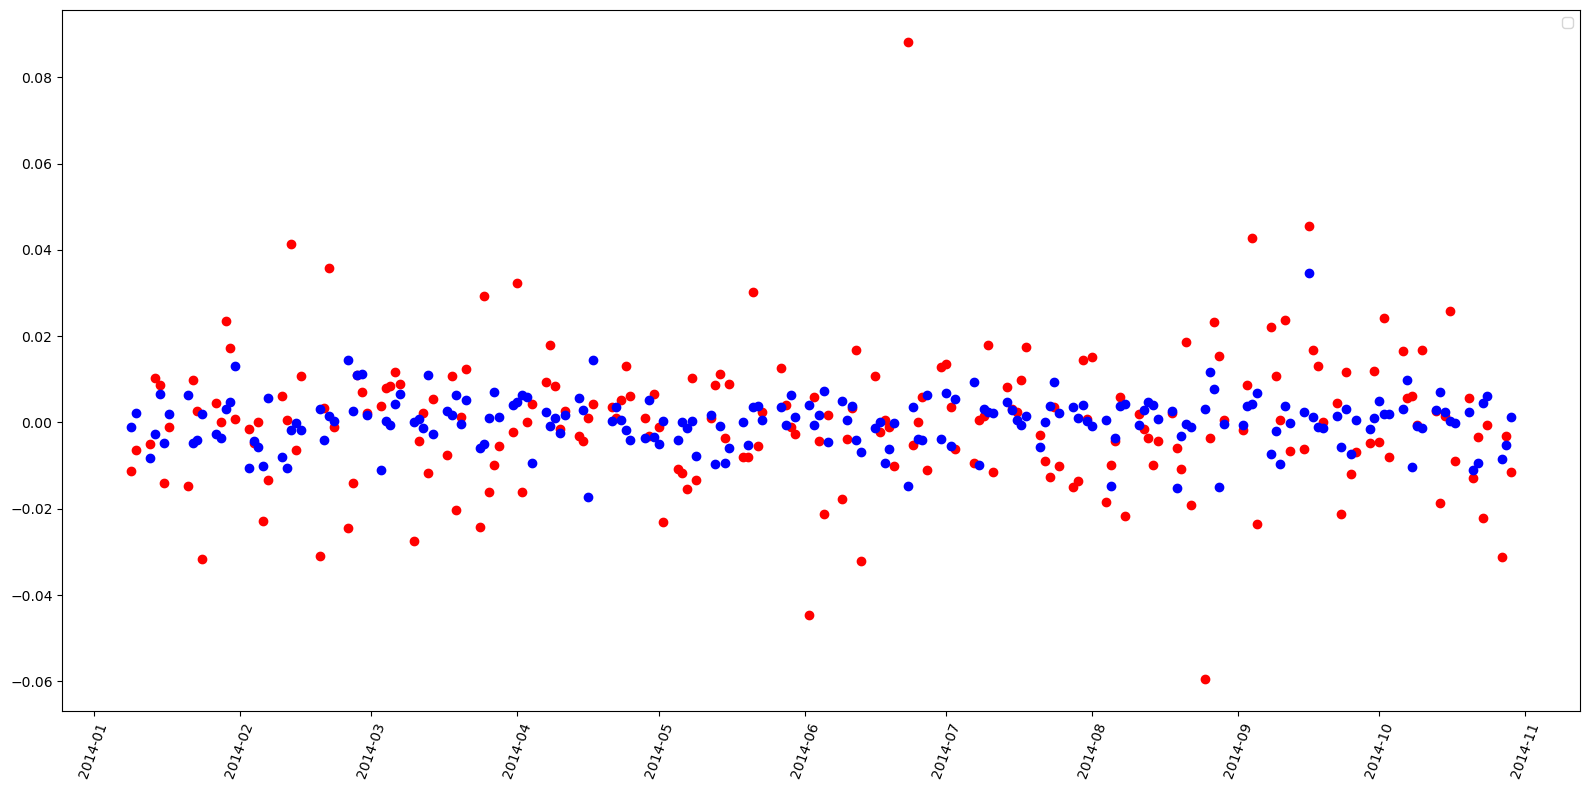

      Iter       Train Loss   Remaining Time 
         1           0.0004            1.42s
         2           0.0004            1.38s
         3           0.0004            1.34s
         4           0.0004            1.31s
         5           0.0004            1.27s
         6           0.0004            1.24s
         7           0.0004            1.22s
         8           0.0004            1.19s
         9           0.0004            1.15s
        10           0.0004            1.13s
        20           0.0003            0.87s
        30           0.0002            0.58s
        40           0.0002            0.29s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.27s
         2           0.0004            1.26s
         3           0.0004            1.23s
         4           0.0004            1.20s
         5           0.0004            1.18s
         6           0.0004            1.16s
        

        10           0.0004            0.90s
        20           0.0003            0.67s
        30           0.0003            0.45s
        40           0.0002            0.22s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.12s
         2           0.0004            1.13s
         3           0.0004            1.09s
         4           0.0004            1.07s
         5           0.0004            1.06s
         6           0.0004            1.04s
         7           0.0004            1.02s
         8           0.0004            1.02s
         9           0.0004            0.99s
        10           0.0004            0.97s
        20           0.0003            0.73s
        30           0.0003            0.49s
        40           0.0002            0.24s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.47s
        

        30           0.0002            0.51s
        40           0.0002            0.26s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.27s
         2           0.0004            1.22s
         3           0.0004            1.21s
         4           0.0004            1.17s
         5           0.0004            1.14s
         6           0.0003            1.12s
         7           0.0003            1.09s
         8           0.0003            1.07s
         9           0.0003            1.05s
        10           0.0003            1.02s
        20           0.0003            0.77s
        30           0.0002            0.51s
        40           0.0002            0.26s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.30s
         2           0.0004            1.23s
         3           0.0004            1.23s
        

        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.22s
         2           0.0004            1.20s
         3           0.0004            1.15s
         4           0.0004            1.12s
         5           0.0004            1.10s
         6           0.0003            1.07s
         7           0.0003            1.04s
         8           0.0003            1.02s
         9           0.0003            1.00s
        10           0.0003            0.98s
        20           0.0003            0.73s
        30           0.0002            0.49s
        40           0.0002            0.24s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.22s
         2           0.0004            1.23s
         3           0.0004            1.21s
         4           0.0004            1.19s
         5           0.0004            1.15s
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        50           0.0001            0.00s


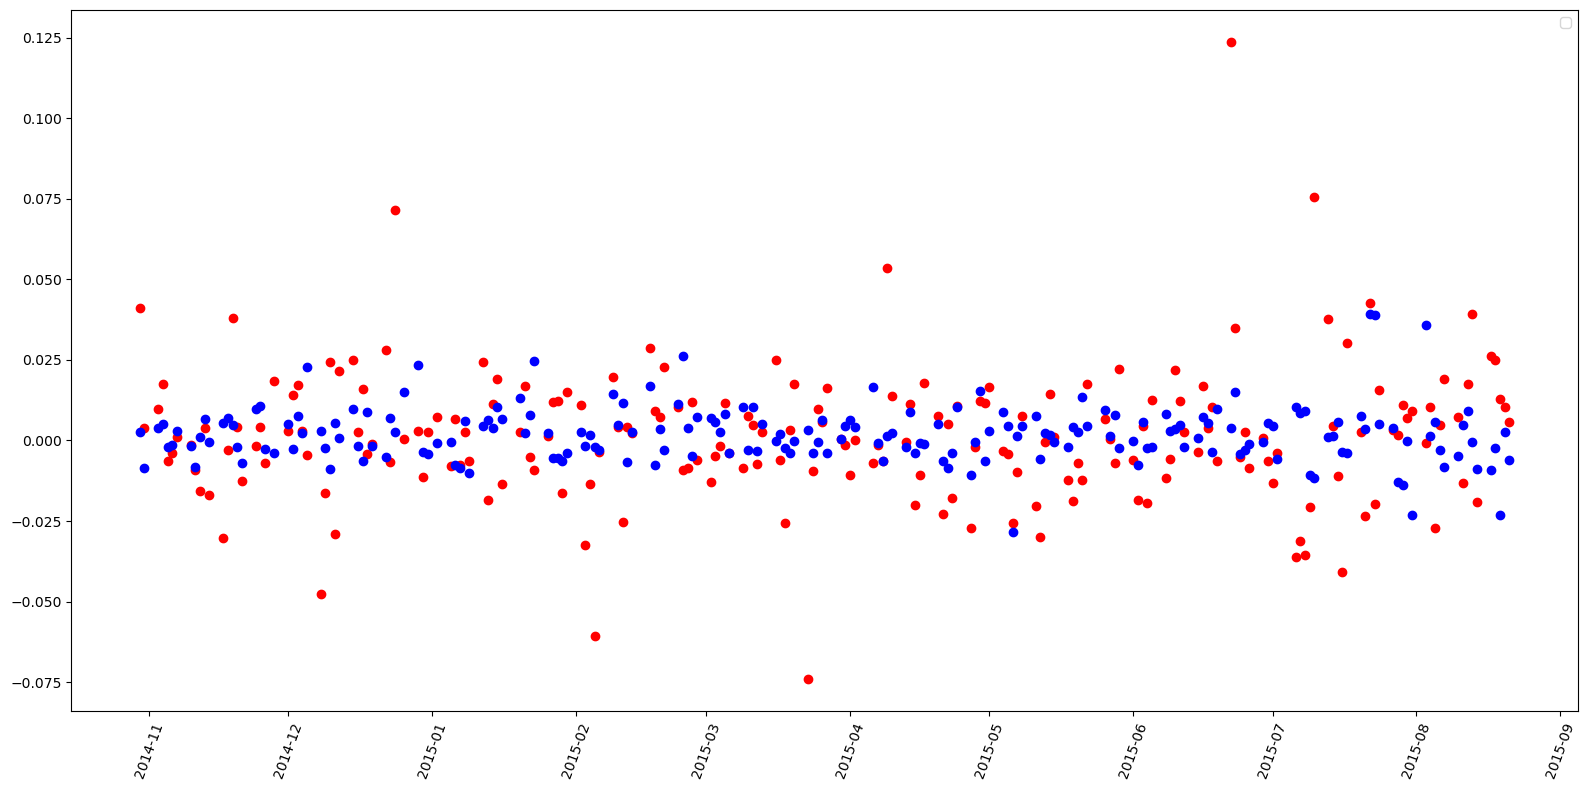

      Iter       Train Loss   Remaining Time 
         1           0.0005            0.98s
         2           0.0005            0.97s
         3           0.0005            0.95s
         4           0.0005            0.91s
         5           0.0005            0.90s
         6           0.0004            0.88s
         7           0.0004            0.86s
         8           0.0004            0.83s
         9           0.0004            0.81s
        10           0.0004            0.79s
        20           0.0003            0.60s
        30           0.0003            0.40s
        40           0.0002            0.20s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.98s
         2           0.0005            0.95s
         3           0.0005            0.93s
         4           0.0005            0.91s
         5           0.0005            0.89s
         6           0.0005            0.87s
        

        10           0.0004            0.93s
        20           0.0004            0.70s
        30           0.0003            0.47s
        40           0.0002            0.23s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.12s
         2           0.0005            1.14s
         3           0.0005            1.12s
         4           0.0005            1.08s
         5           0.0005            1.05s
         6           0.0005            1.03s
         7           0.0005            1.00s
         8           0.0004            0.98s
         9           0.0004            0.96s
        10           0.0004            0.94s
        20           0.0004            0.70s
        30           0.0003            0.47s
        40           0.0002            0.23s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.08s
        

        30           0.0003            0.43s
        40           0.0002            0.21s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.12s
         2           0.0005            1.10s
         3           0.0005            1.11s
         4           0.0005            1.07s
         5           0.0005            1.04s
         6           0.0004            1.01s
         7           0.0004            0.98s
         8           0.0004            0.96s
         9           0.0004            0.93s
        10           0.0004            0.91s
        20           0.0003            0.68s
        30           0.0003            0.45s
        40           0.0002            0.22s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.13s
         2           0.0005            1.10s
         3           0.0005            1.06s
        

         1           0.0006            0.93s
         2           0.0006            0.88s
         3           0.0006            0.87s
         4           0.0006            0.84s
         5           0.0006            0.81s
         6           0.0005            0.79s
         7           0.0005            0.78s
         8           0.0005            0.76s
         9           0.0005            0.75s
        10           0.0005            0.73s
        20           0.0004            0.57s
        30           0.0003            0.38s
        40           0.0003            0.19s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.81s
         2           0.0006            0.80s
         3           0.0006            0.80s
         4           0.0006            0.79s
         5           0.0006            0.78s
         6           0.0005            0.76s
         7           0.0005            0.74s
         

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


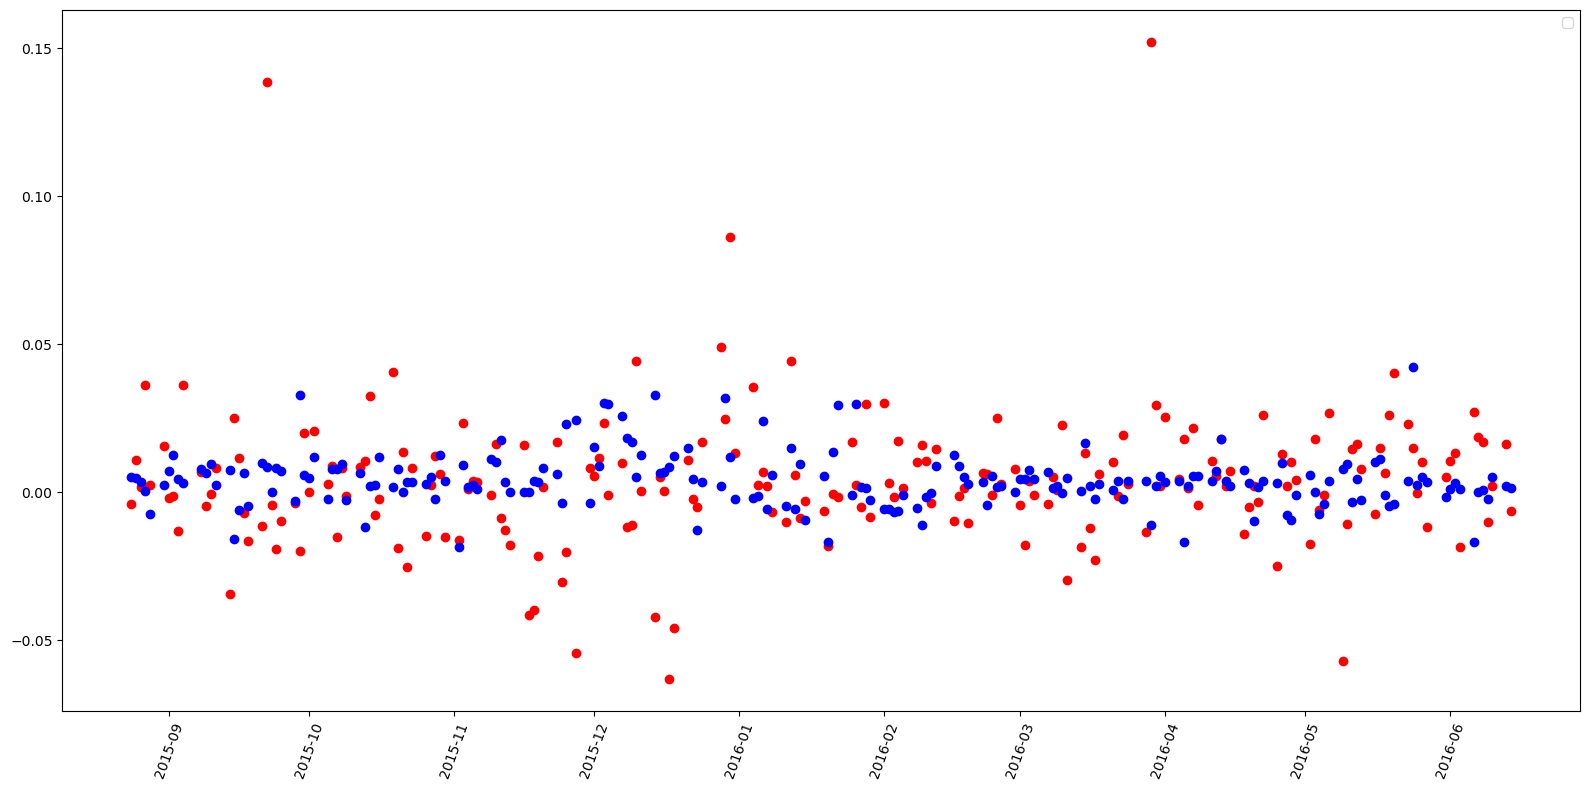

      Iter       Train Loss   Remaining Time 
         1           0.0013            1.10s
         2           0.0013            1.07s
         3           0.0012            1.06s
         4           0.0012            1.02s
         5           0.0012            1.00s
         6           0.0012            0.97s
         7           0.0011            0.95s
         8           0.0011            0.92s
         9           0.0011            0.90s
        10           0.0011            0.88s
        20           0.0009            0.66s
        30           0.0007            0.44s
        40           0.0006            0.22s
        50           0.0005            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0013            1.20s
         2           0.0013            1.14s
         3           0.0012            1.12s
         4           0.0012            1.10s
         5           0.0012            1.06s
         6           0.0012            1.03s
        

         9           0.0006            0.96s
        10           0.0006            0.94s
        20           0.0005            0.73s
        30           0.0004            0.49s
        40           0.0003            0.24s
        50           0.0003            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0007            1.05s
         2           0.0007            1.00s
         3           0.0007            0.98s
         4           0.0007            0.96s
         5           0.0007            0.94s
         6           0.0007            0.91s
         7           0.0006            0.90s
         8           0.0006            0.87s
         9           0.0006            0.85s
        10           0.0006            0.83s
        20           0.0005            0.63s
        30           0.0004            0.46s
        40           0.0003            0.23s
        50           0.0003            0.00s
      Iter       Train Loss   Remaining Time 
        

        20           0.0008            1.03s
        30           0.0007            0.64s
        40           0.0006            0.33s
        50           0.0005            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0012            1.71s
         2           0.0012            1.58s
         3           0.0012            1.53s
         4           0.0011            1.49s
         5           0.0011            1.42s
         6           0.0011            1.45s
         7           0.0011            1.47s
         8           0.0011            1.48s
         9           0.0010            1.45s
        10           0.0010            1.42s
        20           0.0008            1.04s
        30           0.0007            0.72s
        40           0.0006            0.37s
        50           0.0005            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0012            1.67s
         2           0.0012            1.61s
        

        40           0.0005            0.27s
        50           0.0004            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0010            1.26s
         2           0.0010            1.22s
         3           0.0010            1.17s
         4           0.0010            1.14s
         5           0.0010            1.10s
         6           0.0009            1.08s
         7           0.0009            1.04s
         8           0.0009            1.02s
         9           0.0009            1.00s
        10           0.0009            0.98s
        20           0.0007            0.78s
        30           0.0006            0.53s
        40           0.0005            0.27s
        50           0.0004            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0011            1.77s
         2           0.0011            1.72s
         3           0.0010            1.63s
         4           0.0010            1.58s
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        50           0.0004            0.00s


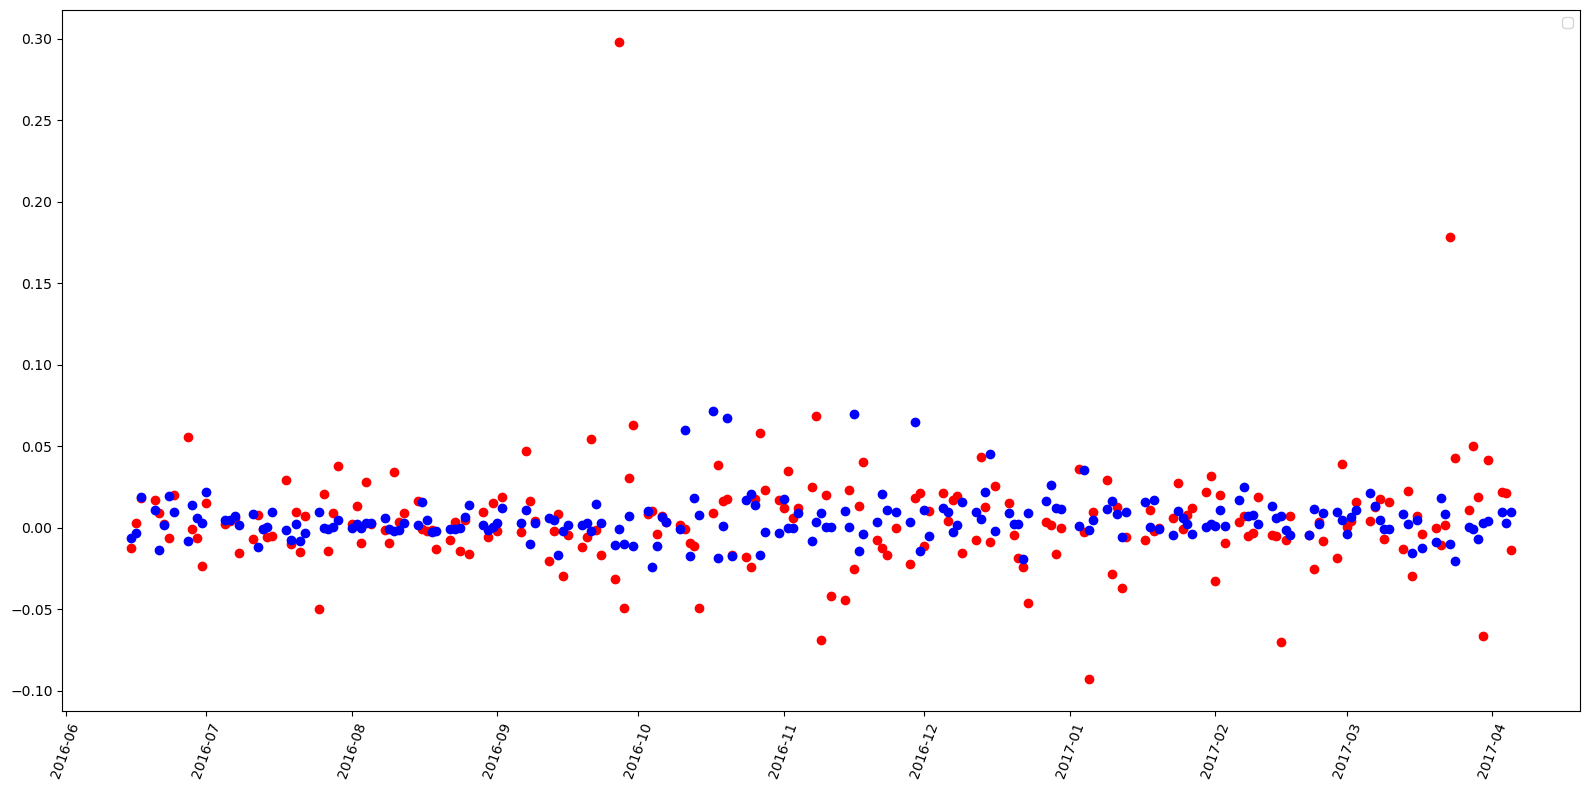

      Iter       Train Loss   Remaining Time 
         1           0.0005            1.28s
         2           0.0005            1.25s
         3           0.0005            1.24s
         4           0.0005            1.18s
         5           0.0005            1.18s
         6           0.0005            1.19s
         7           0.0004            1.17s
         8           0.0004            1.14s
         9           0.0004            1.12s
        10           0.0004            1.10s
        20           0.0003            0.84s
        30           0.0003            0.55s
        40           0.0002            0.27s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.31s
         2           0.0005            1.27s
         3           0.0005            1.19s
         4           0.0005            1.12s
         5           0.0005            1.09s
         6           0.0005            1.08s
        

         7           0.0005            1.26s
         8           0.0004            1.23s
         9           0.0004            1.20s
        10           0.0004            1.20s
        20           0.0004            0.91s
        30           0.0003            0.60s
        40           0.0002            0.30s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.28s
         2           0.0005            1.30s
         3           0.0005            1.31s
         4           0.0005            1.25s
         5           0.0005            1.24s
         6           0.0005            1.22s
         7           0.0005            1.19s
         8           0.0005            1.18s
         9           0.0004            1.16s
        10           0.0004            1.13s
        20           0.0004            0.89s
        30           0.0003            0.57s
        40           0.0002            0.28s
        5

        10           0.0004            0.95s
        20           0.0004            0.71s
        30           0.0003            0.47s
        40           0.0002            0.24s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.90s
         2           0.0005            0.92s
         3           0.0005            0.88s
         4           0.0005            0.86s
         5           0.0005            0.86s
         6           0.0005            0.84s
         7           0.0005            0.82s
         8           0.0005            0.80s
         9           0.0005            0.78s
        10           0.0005            0.75s
        20           0.0004            0.57s
        30           0.0003            0.38s
        40           0.0002            0.19s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.97s
        

        30           0.0003            0.56s
        40           0.0002            0.28s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.32s
         2           0.0005            1.33s
         3           0.0005            1.28s
         4           0.0005            1.26s
         5           0.0005            1.25s
         6           0.0004            1.22s
         7           0.0004            1.19s
         8           0.0004            1.17s
         9           0.0004            1.14s
        10           0.0004            1.10s
        20           0.0003            0.83s
        30           0.0003            0.55s
        40           0.0002            0.28s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.42s
         2           0.0005            1.37s
         3           0.0005            1.32s
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        50           0.0002            0.00s


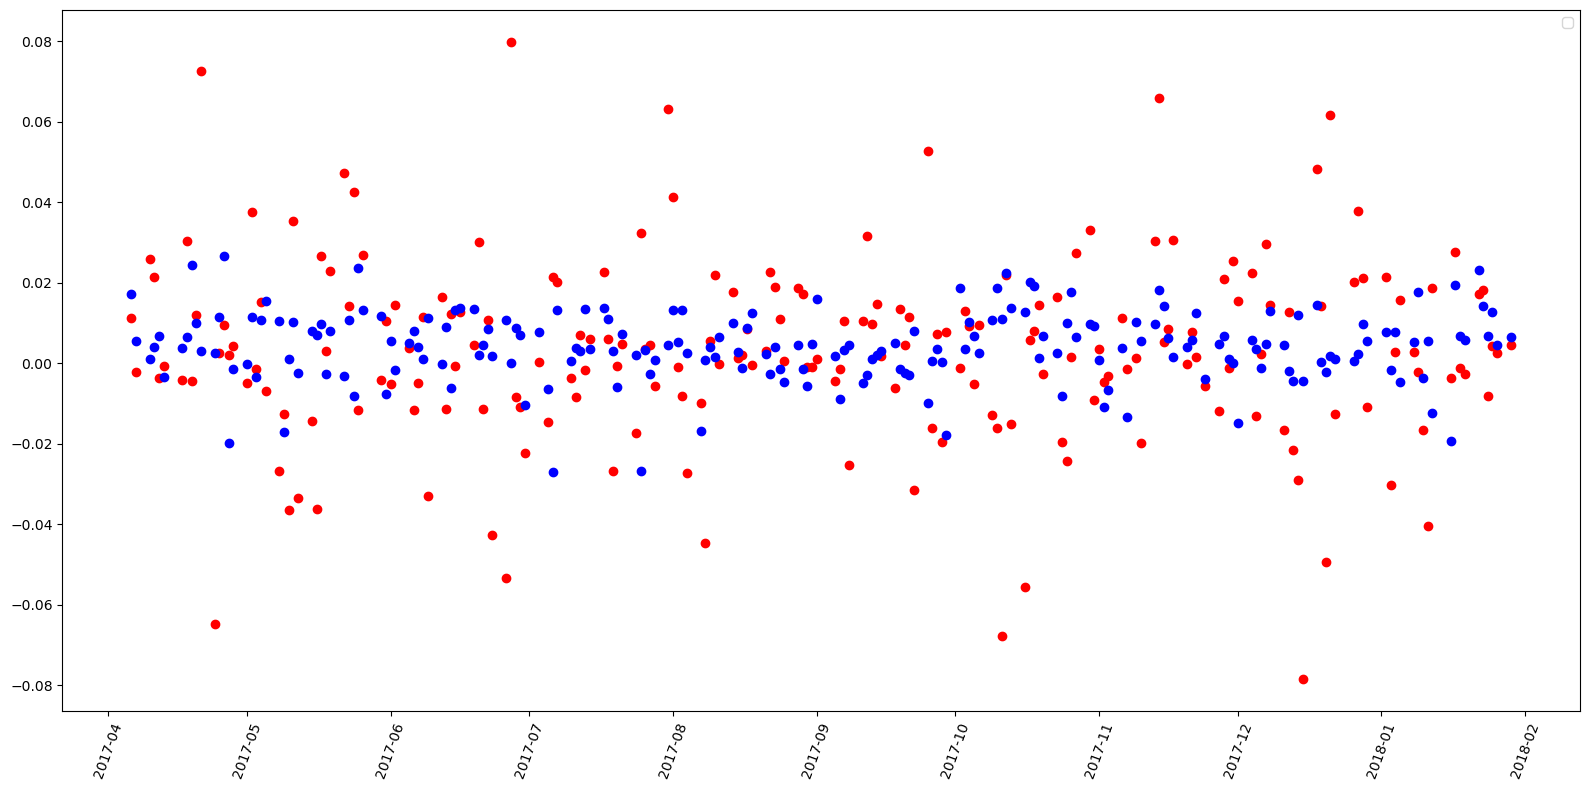

In [57]:
from sklearn.model_selection import cross_val_predict

for train_index, test_index in tscv.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index] , y.iloc[test_index]
    
    y_predicted = cross_val_predict(regressor, X_test, y = y_test)
    plotme(y_test, y_predicted, '33d', 0)

      Iter       Train Loss   Remaining Time 
         1           0.0002            1.30s
         2           0.0002            1.27s
         3           0.0002            1.21s
         4           0.0002            1.17s
         5           0.0002            1.15s
         6           0.0002            1.11s
         7           0.0002            1.09s
         8           0.0002            1.08s
         9           0.0002            1.07s
        10           0.0002            1.04s
        20           0.0002            0.76s
        30           0.0001            0.51s
        40           0.0001            0.25s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            1.28s
         2           0.0002            1.21s
         3           0.0002            1.18s
         4           0.0002            1.16s
         5           0.0002            1.13s
         6           0.0002            1.14s
        

        10           0.0002            0.92s
        20           0.0002            0.68s
        30           0.0002            0.46s
        40           0.0001            0.23s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            1.18s
         2           0.0003            1.16s
         3           0.0003            1.14s
         4           0.0003            1.09s
         5           0.0003            1.03s
         6           0.0002            0.98s
         7           0.0002            0.94s
         8           0.0002            0.90s
         9           0.0002            0.88s
        10           0.0002            0.85s
        20           0.0002            0.61s
        30           0.0002            0.41s
        40           0.0001            0.22s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            1.06s
        

        40           0.0001            0.17s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.97s
         2           0.0002            0.95s
         3           0.0002            0.94s
         4           0.0002            0.92s
         5           0.0002            0.90s
         6           0.0002            0.88s
         7           0.0002            0.86s
         8           0.0002            0.84s
         9           0.0002            0.83s
        10           0.0002            0.80s
        20           0.0002            0.61s
        30           0.0001            0.41s
        40           0.0001            0.20s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.98s
         2           0.0002            0.96s
         3           0.0002            0.95s
         4           0.0002            0.93s
        

         1           0.0002            0.88s
         2           0.0002            0.89s
         3           0.0002            0.88s
         4           0.0002            0.84s
         5           0.0002            0.82s
         6           0.0002            0.82s
         7           0.0002            0.80s
         8           0.0002            0.78s
         9           0.0002            0.76s
        10           0.0002            0.75s
        20           0.0002            0.56s
        30           0.0001            0.37s
        40           0.0001            0.18s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            0.88s
         2           0.0002            0.89s
         3           0.0002            0.88s
         4           0.0002            0.87s
         5           0.0002            0.84s
         6           0.0002            0.82s
         7           0.0002            0.80s
         

KeyError: '48d'

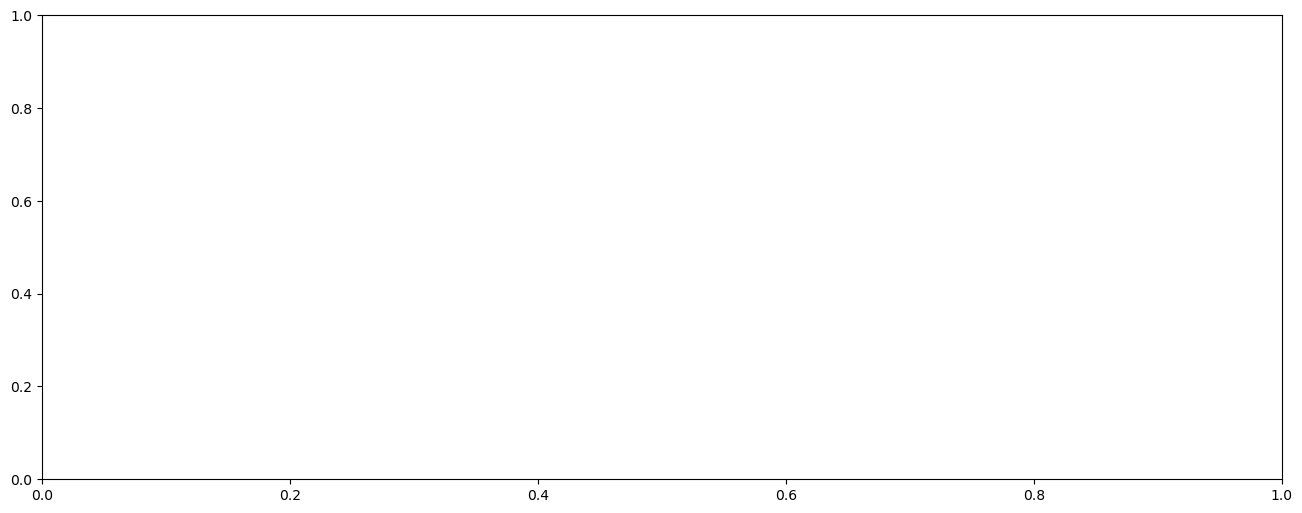

In [58]:
from sklearn.model_selection import cross_val_predict

for train_index, test_index in tscv.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index] , y.iloc[test_index]
    
    y_predicted = cross_val_predict(regressor, X_test, y = y_test)
    plotme(y_test, y_predicted, '48d', 7)

C:\Users\GOD WORLD\AppData\Local\Temp\tmpqo0sx8vv\ipykernel_23980\1996515969.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  ax.scatter(range(len(indices)), indices, marker='_', lw=lw, cmap=plt.cm.coolwarm, vmin=0.2, vmax=1.2)


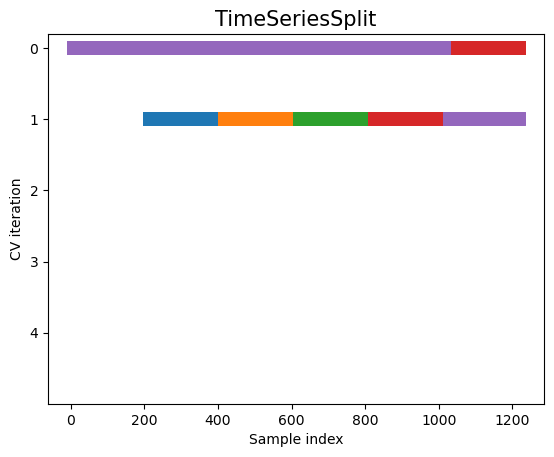

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    # Generate the training and testing visualization
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in the indices with the test and training groups
        indices = np.zeros(len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), indices, marker='_', lw=lw, cmap=plt.cm.coolwarm, vmin=0.2, vmax=1.2)

    # Formatting
    ax.set(yticks=np.arange(n_splits), xlabel='Sample index', ylabel='CV iteration', ylim=[n_splits, -0.2])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)

    return ax

# Example usage
fig, ax = plt.subplots()
# You need to provide valid values for tscv, X, and y here
plot_cv_indices(tscv, X, y, ax, 5)
plt.show()


C:\Users\GOD WORLD\AppData\Local\Temp\tmpqo0sx8vv\ipykernel_23980\1996515969.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  ax.scatter(range(len(indices)), indices, marker='_', lw=lw, cmap=plt.cm.coolwarm, vmin=0.2, vmax=1.2)


<Axes: title={'center': 'TimeSeriesSplit'}, xlabel='Sample index', ylabel='CV iteration'>

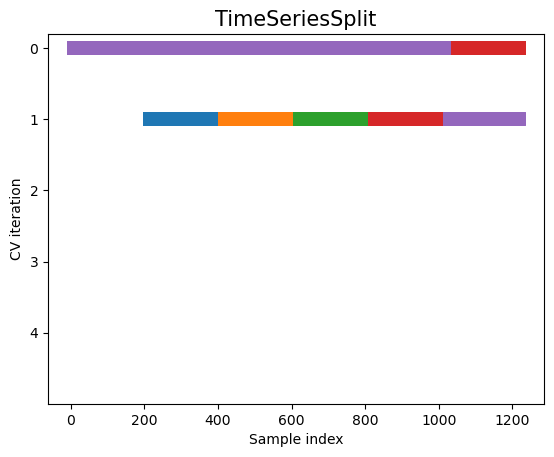

In [66]:
fig, ax = plt.subplots()

plot_cv_indices(tscv, X, y,ax, 5)